<H1> 1. Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('boat_data.csv')
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [2]:
df.head(-5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
...,...,...,...,...,...,...,...,...,...,...
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland,1917
9879,CHF 4990,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,NaN,Switzerland,280
9880,CHF 4980,Sport Boat,Linder power boats,new boat from stock,0,4.01,1.64,Aluminium,Switzerland,247
9881,CHF 4950,Sport Boat,Marine power boats,new boat from stock,0,3.99,1.52,Aluminium,Switzerland,150


<H1> 2. Data preprocessing

<H3>  Unify values with different units

In [3]:
df[['currency','Price']] = df['Price'].str.split(' ', n=1, expand=True)

In [4]:
df['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [5]:
def eurprice(Price,currency):
    if currency == 'EUR':
        return Price
    elif currency == 'CHF':
        return int(Price) * 1.02
    elif currency == 'DKK':
        return int(Price) * 0.13
    elif currency == 'Â£':
        return int(Price) * 1.17
df['EUR_price'] = df.apply(lambda x: eurprice(x.Price, x.currency), axis=1)
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,EUR_price
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF,3403.74
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF,3845.4
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK,3367.0
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399


In [6]:
df_1 = df.drop(['currency','Price'], axis=1)

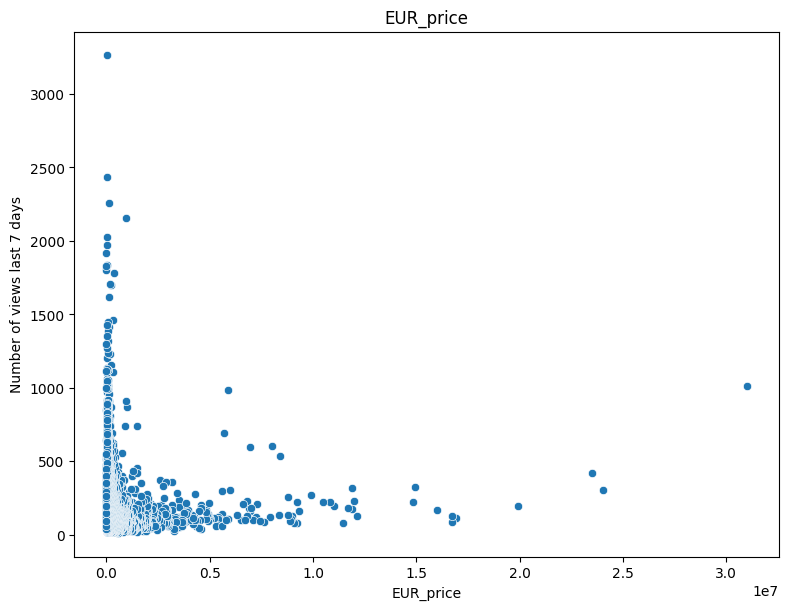

In [7]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.scatterplot(x='EUR_price', y='Number of views last 7 days',data=df_1)
ax1.set_title("EUR_price")
plt.savefig('EUR_price.png')

In [8]:
df_1.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
EUR_price                         0
dtype: int64

<H3> Extract only the first 'Boat Type' when the boat is labeled as two different types in certain rows

In [9]:
df_1[['Boat Type','Boat Type1']] = df_1['Boat Type'].str.split(',', n=1, expand=True)
df_1 = df_1.drop(['Boat Type1'], axis=1)

In [10]:
df_1['Type'].fillna(df_1['Type'].value_counts().idxmax(), inplace=True)

Text(0.5, 1.0, 'Width Distribution')

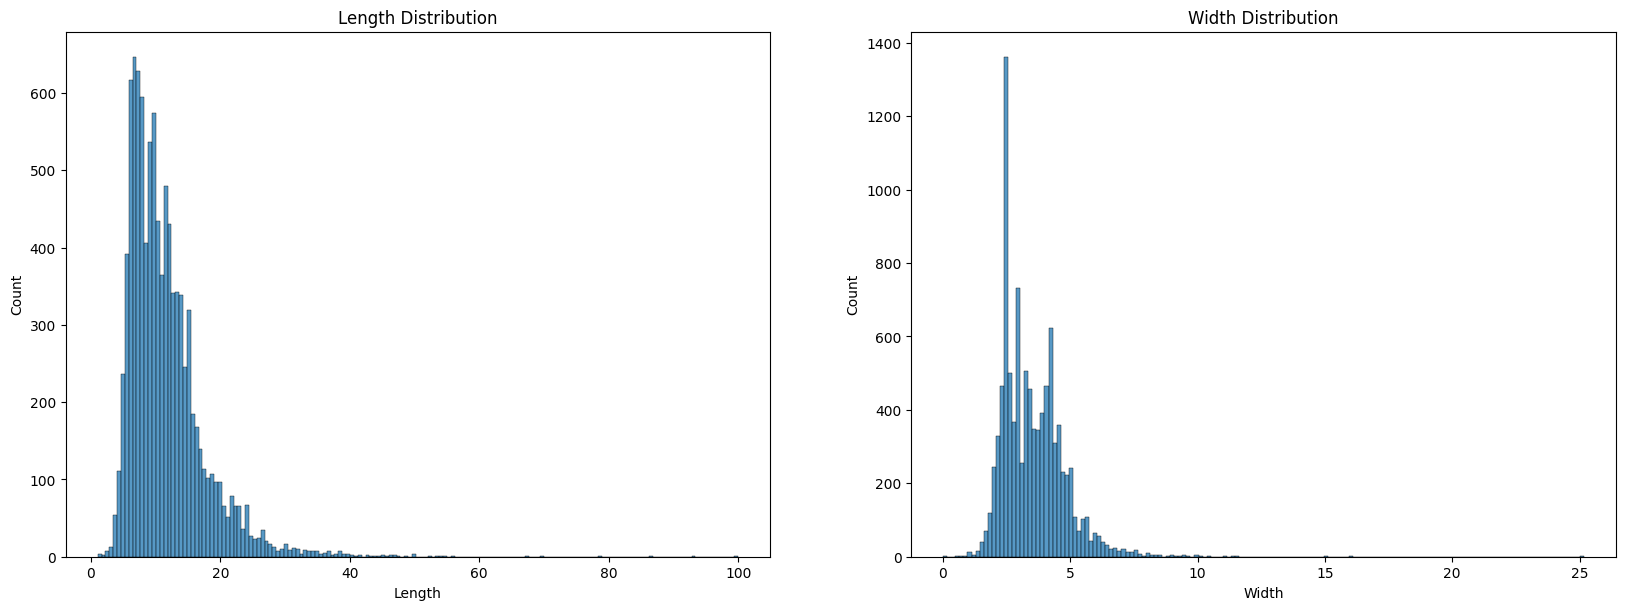

In [11]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.histplot(df_1.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.histplot(df_1.Width)
ax2.set_title("Width Distribution")

<H3> Impute the missing values in 'Width' and 'Length' columns with median value

In [12]:
df_1['Width'].fillna(df_1['Width'].median(), inplace=True)
df_1['Length'].fillna(df_1['Length'].median(), inplace=True)

<H3> Impute the missing values in 'Material' columns with mode value

In [13]:
df_1['Material'].fillna(df_1['Material'].value_counts().idxmax(), inplace=True)

In [14]:
df_1.duplicated().sum()

0

<H3> Drop missing values in 'Manufacturer' and 'Location' columns 

In [15]:
df_1.dropna(subset=['Manufacturer','Location'], inplace=True)

In [16]:
df_1.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
EUR_price                      0
dtype: int64

<H3> Convert datatype in 'EUR_price' column to float

In [17]:
df_1['EUR_price'] = df['EUR_price'].astype(float)

In [18]:
df_1.head(-5)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,EUR_price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,Switzerland,226,3403.74
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,3490.00
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,3845.40
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,Denmark,64,3367.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,3399.00
...,...,...,...,...,...,...,...,...,...,...
9877,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,Switzerland,1299,5100.00
9878,Sport Boat,Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland,1917,5098.98
9879,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,GRP,Switzerland,280,5089.80
9880,Sport Boat,Linder power boats,new boat from stock,0,4.01,1.64,Aluminium,Switzerland,247,5079.60


<H1> 3. Exploratory Data Analysis

<H3> Explore the impact of 'Boat Type' on Number of views:
    <H5>Top 3 popular boat type:  Wakeboard/Wakesurf, Water ski , Classic

,Boat Type,Number of views last 7 days
0,Wakeboard/Wakesurf,373.450000
1,Water ski,316.777778
2,Classic,288.800000
3,House Boat,260.296296
4,Cabin Boat,250.885077


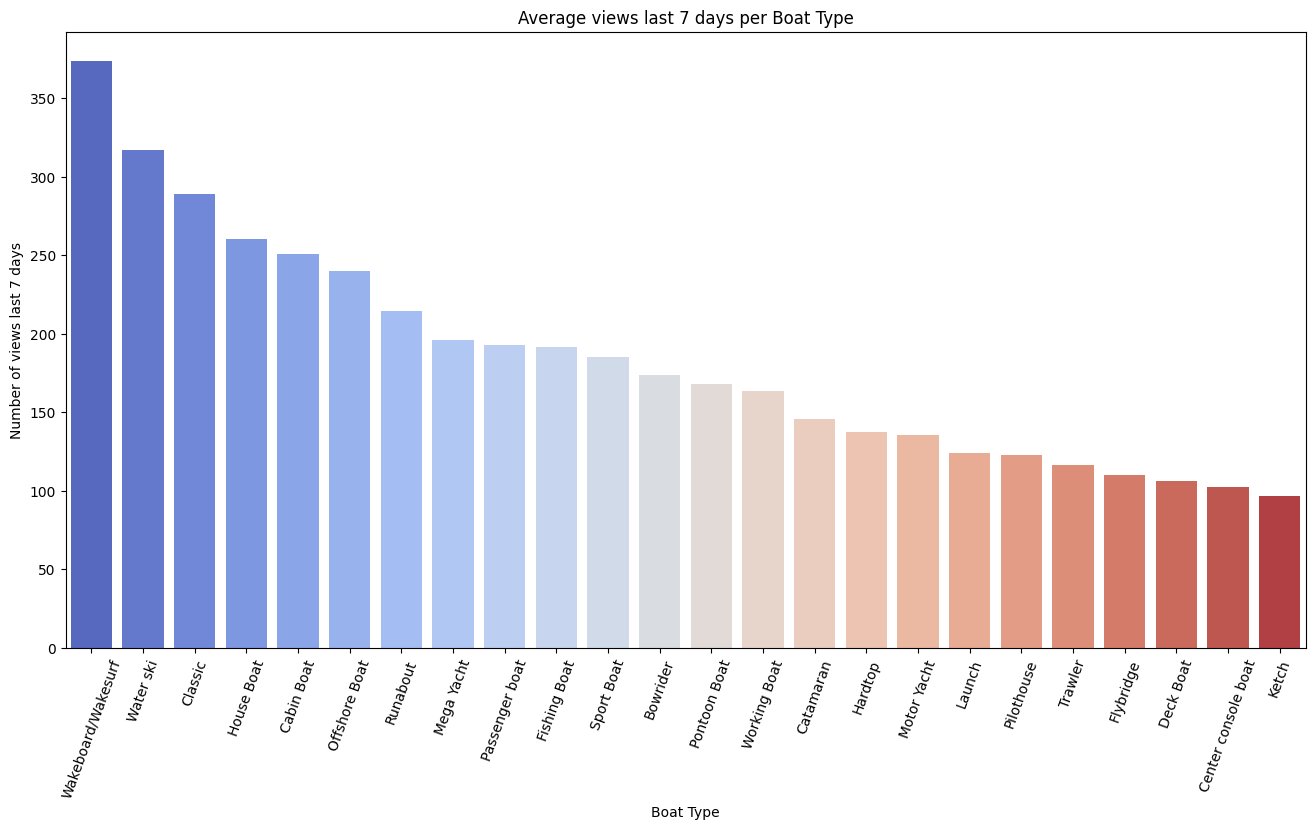

In [19]:
fig = plt.figure(figsize=(16,8) )
Boat_Type_View= df_1.groupby('Boat Type')['Number of views last 7 days'].mean().sort_values(ascending=False).reset_index(drop=False)

sns.barplot(x='Boat Type', y='Number of views last 7 days', data=Boat_Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Boat Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
display(Boat_Type_View[:5])
plt.savefig('Boat_Type.png')

<H3> Extract the Engine type from 'Type' column and explore the impact of 'Boat Type' on Number of views:
    <H5>In overall, hybrid engine has highest average views       

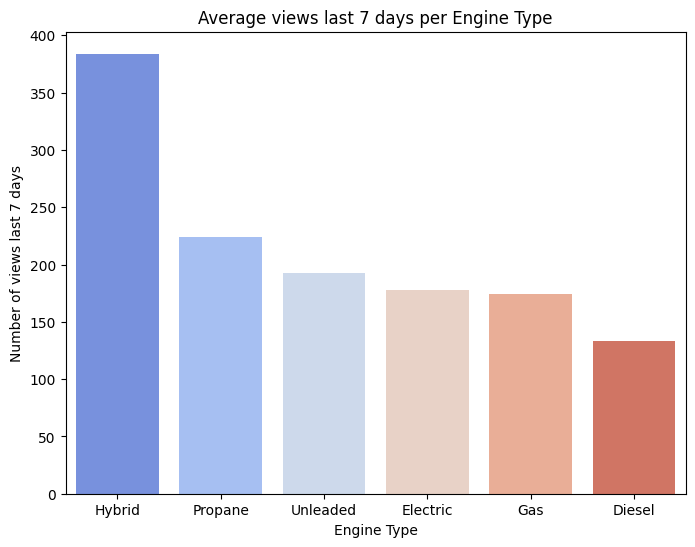

In [20]:
df_1['Engine Type'] = df_1['Type'].str.split(pat=',', expand=True)[1]

df_1['Engine Type'] = df_1['Engine Type'].replace('None', np.nan)

fig = plt.figure(figsize=(8,6) )
Type_View= df_1.groupby('Engine Type')['Number of views last 7 days'].mean().sort_values(ascending=False).reset_index(drop=False)

sns.barplot(x='Engine Type', y='Number of views last 7 days', data=Type_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Engine Type")

plt.savefig('Engine Type.png')

<H3> Extract the boat condition from 'Type' column and explore the impact of 'Condition' on Number of views:
    <H5> In general, used boat has higher average views than new boat 

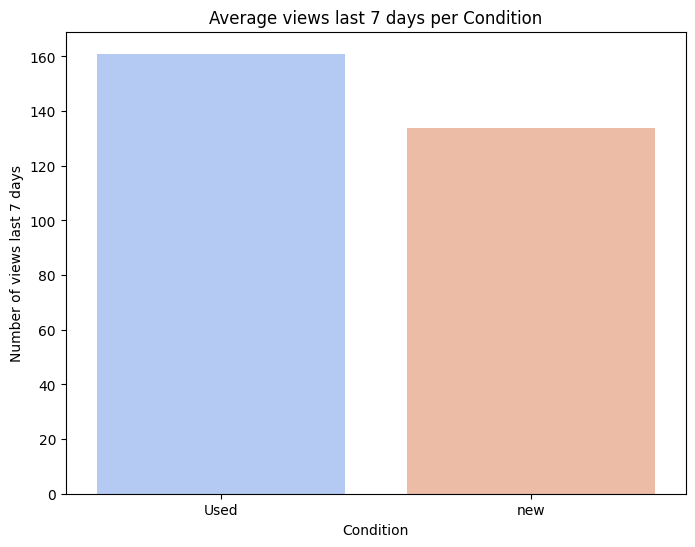

In [21]:
df_1['Condition'] = df_1['Type'].str.split(pat = ' ', expand = True)[0]

df_1['Condition'] = df_1['Condition'].replace({'Unleaded':np.nan, 0:np.nan})
df_1['Condition'] = df_1['Condition'].replace({'Diesel':np.nan, 0:np.nan})
df_1['Condition'] = df_1['Condition'].replace({'Electric':np.nan, 0:np.nan})

df_1.loc[df_1['Condition'] == 'Display', 'Condition'] = 'new'

fig = plt.figure(figsize=(8,6) )
Condition = df_1.groupby('Condition')['Number of views last 7 days'].mean().sort_values(ascending=False).reset_index(drop=False)

sns.barplot(x='Condition', y='Number of views last 7 days', data=Condition,
                 palette="coolwarm")
plt.title("Average views last 7 days per Condition")
plt.savefig('Condition.png')

In [22]:
df_1.head(-5)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,EUR_price,Engine Type,Condition
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,Switzerland,226,3403.74,None,new
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,3490.00,None,new
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,3845.40,None,new
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,Denmark,64,3367.00,None,new
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,3399.00,None,new
...,...,...,...,...,...,...,...,...,...,...,...,...
9877,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,Switzerland,1299,5100.00,None,Used
9878,Sport Boat,Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland,1917,5098.98,Unleaded,Used
9879,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,GRP,Switzerland,280,5089.80,None,new
9880,Sport Boat,Linder power boats,new boat from stock,0,4.01,1.64,Aluminium,Switzerland,247,5079.60,None,new


<H3> Explore the impact of 'Material' on Number of views:
    <H5> Boat made with plastic get highest average views

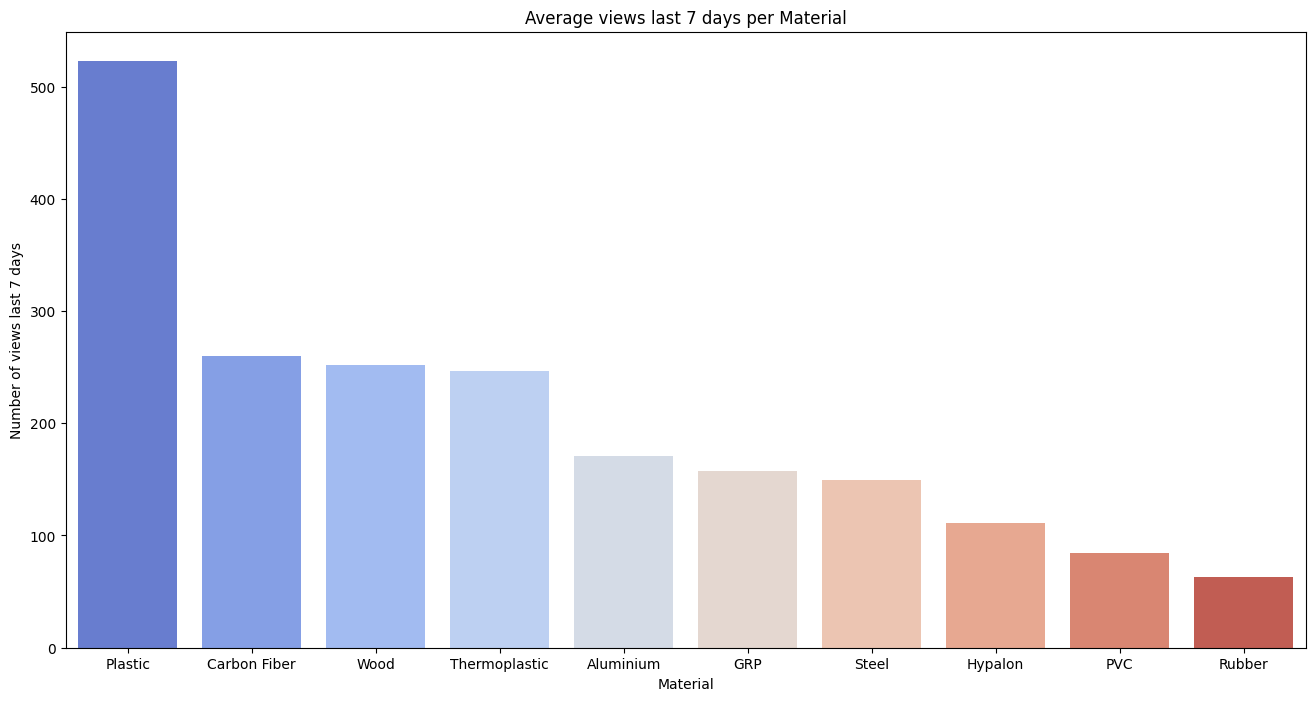

In [23]:
fig = plt.figure(figsize=(16,8) )
Material_View= df_1.groupby('Material')['Number of views last 7 days'].mean().sort_values(ascending=False).reset_index(drop=False)


sns.barplot(x='Material', y='Number of views last 7 days', data=Material_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Material")
plt.savefig('Material.png')

<H3> Extract the top 10 countries with most total number of views 

In [24]:
df_1['Location'].unique()

array(['Switzerland', 'Germany', 'Denmark', 'Italy', 'France', 'United',
       'Spain', 'Austria', 'Netherlands', 'Serbia', 'Belgium', 'Slovak',
       'Croatia', 'Portugal', 'Malta', 'Montenegro', 'Latvia', 'Rovinij',
       'Steinwiesen', 'Slovenia', 'Greece', 'Rolle', 'baden', 'Donau',
       'TravemÃ¼nde', 'Lake', 'Poland', 'Stralsund', 'Rostock', 'Turkey',
       'Finland', 'lago', 'BelgiÃ«,', 'Hungary', 'Brandenburg', 'RÃ¼gen',
       'Zevenbergen', 'Oder', 'Cyprus', 'Faoug', 'Beilngries', 'Sweden',
       'Marina', 'French', 'Italien', 'Estonia', 'Monaco', 'Russian',
       'waren', 'Egypt', 'Jersey', 'Australia', 'Bulgaria', 'Taiwan',
       'Thailand', 'Luxembourg', 'Venezuela', 'Neustadt', 'Ireland',
       'Ukraine', 'Adria', 'Martinique', 'Norway', 'Seychelles',
       'Morocco', 'Gibraltar', 'Lebanon', 'Czech', 'Ostsee', 'Mallorca',
       'Greetsile/', 'Lithuania', 'annecy', 'Izola', 'Novi', 'Italie',
       'Dalmatien', 'Lago', 'Opwijk', 'NordseekÃ¼ste', 'Isle', '24782'

[Text(0, 0, 'Germany'),
 Text(1, 0, 'Italy'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Switzerland'),
 Text(4, 0, 'Croatia'),
 Text(5, 0, 'Spain'),
 Text(6, 0, 'Other'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'United'),
 Text(9, 0, 'Denmark')]

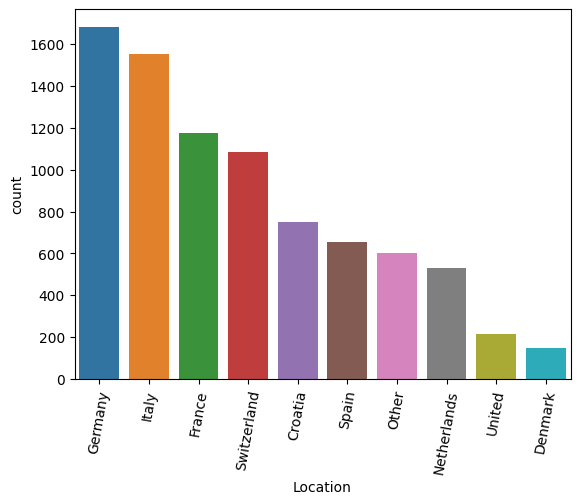

In [25]:
top10_country = df_1.Location.value_counts().iloc[:10].index
df_1.loc[~df_1['Location'].isin(top10_country),'Location']='Other'
ax = sns.countplot(x = 'Location', data = df_1, order = df_1.Location.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)

<H3> Explore the impact of 'Location' on Number of views:

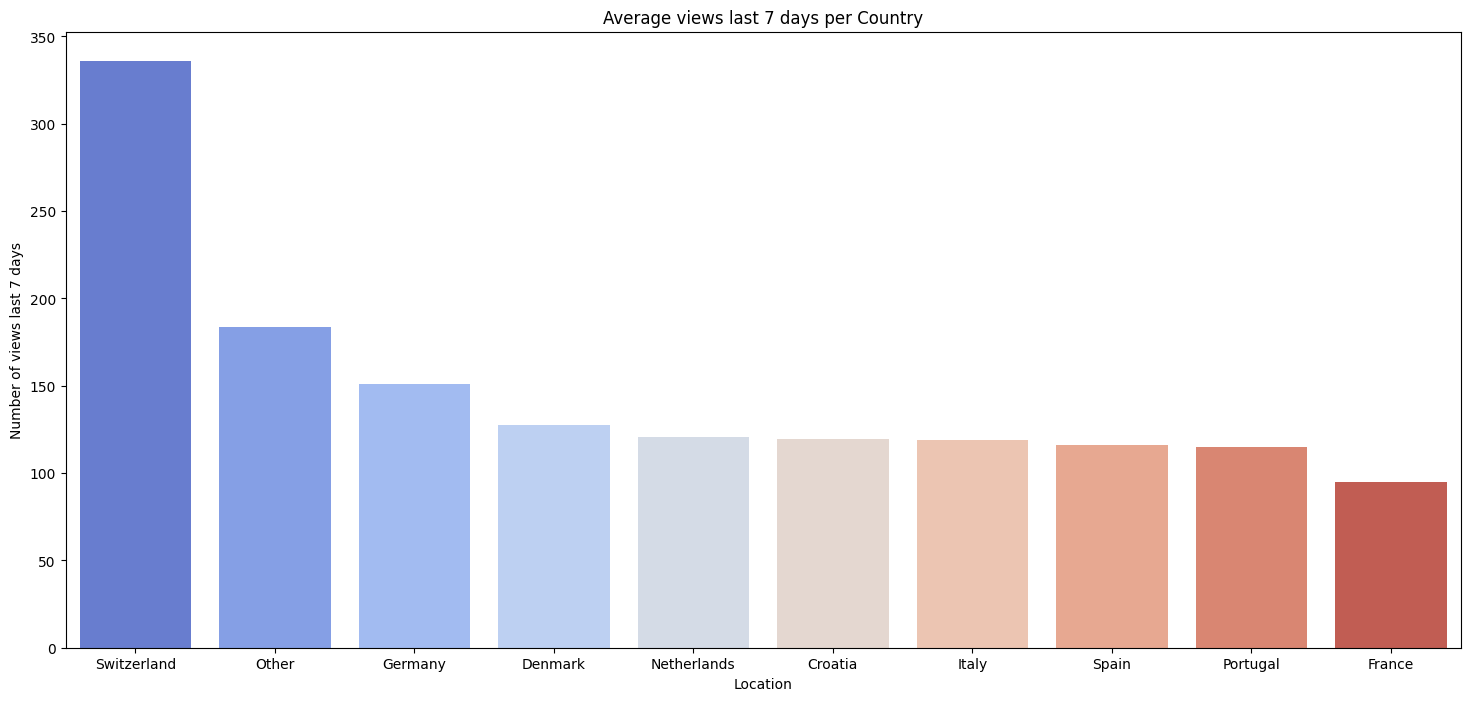

In [26]:
fig = plt.figure(figsize=(18,8) )
Country_View= df_1.groupby('Location')['Number of views last 7 days'].mean().sort_values(ascending=False).reset_index(drop=False)

sns.barplot(x='Location', y='Number of views last 7 days', data=Country_View[:10],
                 palette="coolwarm")
plt.title("Average views last 7 days per Country")
Country_View.head(10)
plt.savefig('Location.png')

<H3> Explore 'Usage Condition' vs Views for Different Countries
    <H5>In some countries, used boat can get significantly higher average views than new boat (e.g. Switzerland, Denmark and Germany). For most countries, the difference is small.

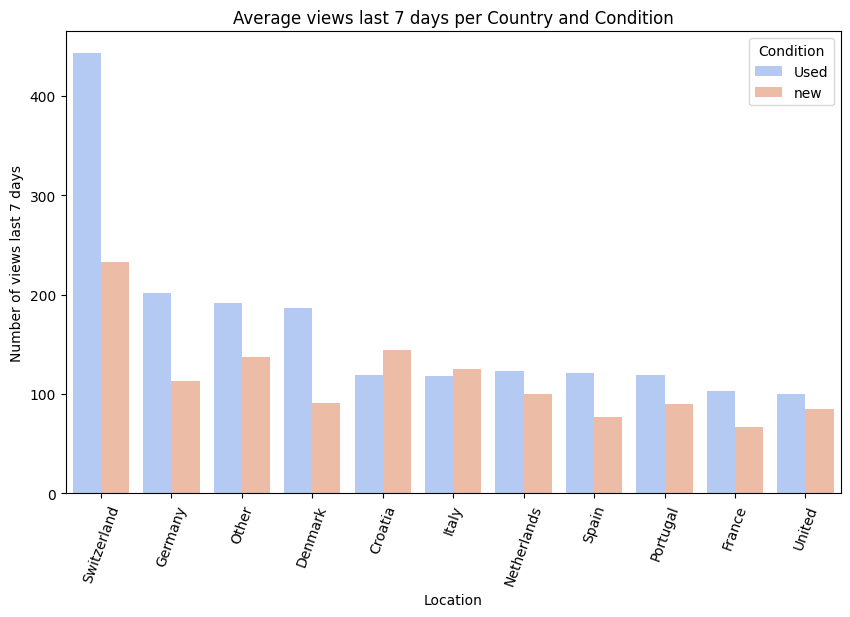

In [27]:
fig = plt.figure(figsize=(10,6) )
Country_View= df_1.groupby(['Location','Condition'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Location'],ascending=False)
sns.barplot(x='Location', y='Number of views last 7 days',hue='Condition', data=Country_View,
                 palette="coolwarm")
plt.title("Average views last 7 days per Country and Condition")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

<H3> Explore 'Engine Type' vs Views for Different Countries
    <H5> Engine type with most average views differs for different countries:
    
    1. Hybrid: Switzerland
    2. Unleaded:  Netherland, UK, Denmark
    3. Gas: Croatia, Portugal, Spain

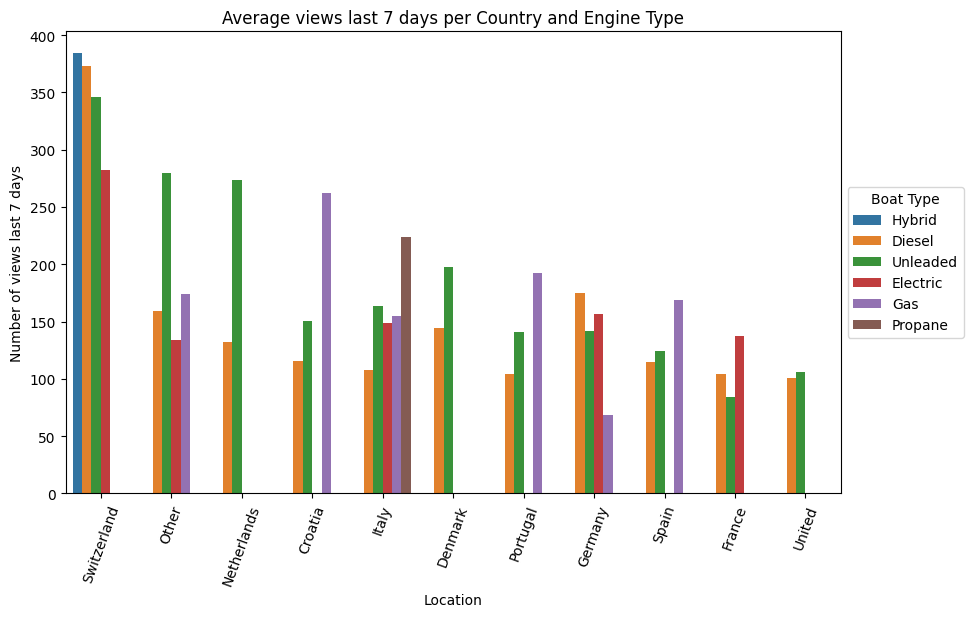

In [28]:
fig = plt.figure(figsize=(10,6))
Country_View1= df_1.groupby(['Location','Engine Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Location'],ascending=False)
sns.barplot(x='Location', y='Number of views last 7 days',hue='Engine Type', data=Country_View1)
plt.title("Average views last 7 days per Country and Engine Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')
plt.savefig('engine type.png')

<H3> Explore 'Material' vs Views for Different Countries
    <H5>Boat material with most average views for different countries differs significantly (For e.g.
France: Aluminum).
      

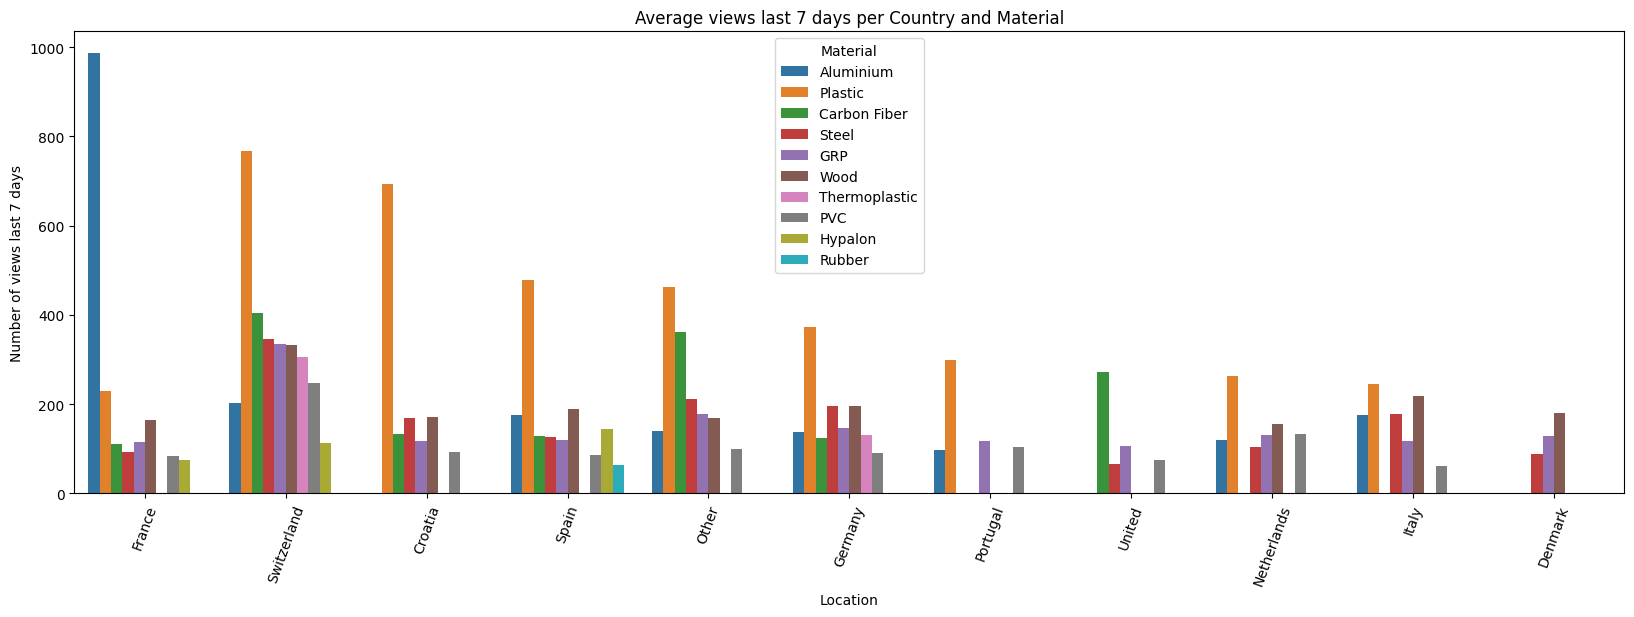

In [29]:
fig = plt.figure(figsize=(20,6))
Country_View2= df_1.groupby(['Location','Material'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Location'],ascending=False)
sns.barplot(x='Location', y='Number of views last 7 days',hue='Material', data=Country_View2)
plt.title("Average views last 7 days per Country and Material")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)

<H3> Inspect the correlation between 'Number of views last 7 days' and various parameters

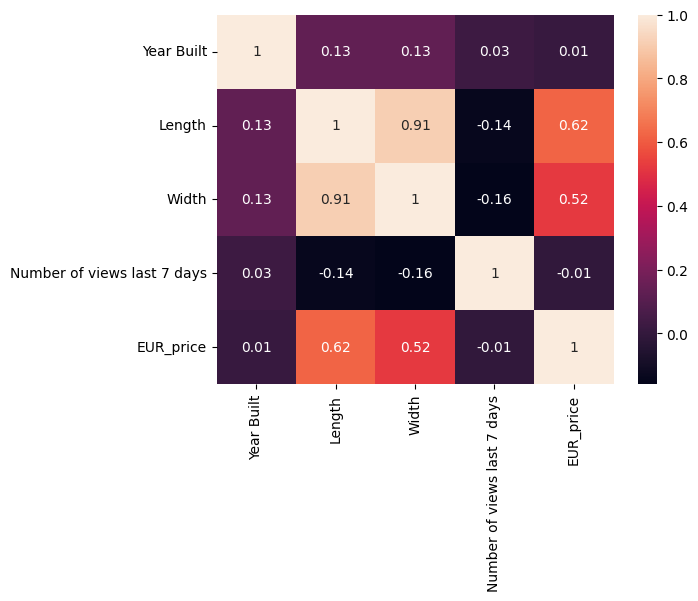

In [30]:
corr = df_1.corr(numeric_only=True).round(2)
sns.heatmap(corr, annot=True)
plt.show()

<H3> Explore the impact of 'Year Built' on number of views

Text(0.5, 1.0, 'Year Built Distribution')

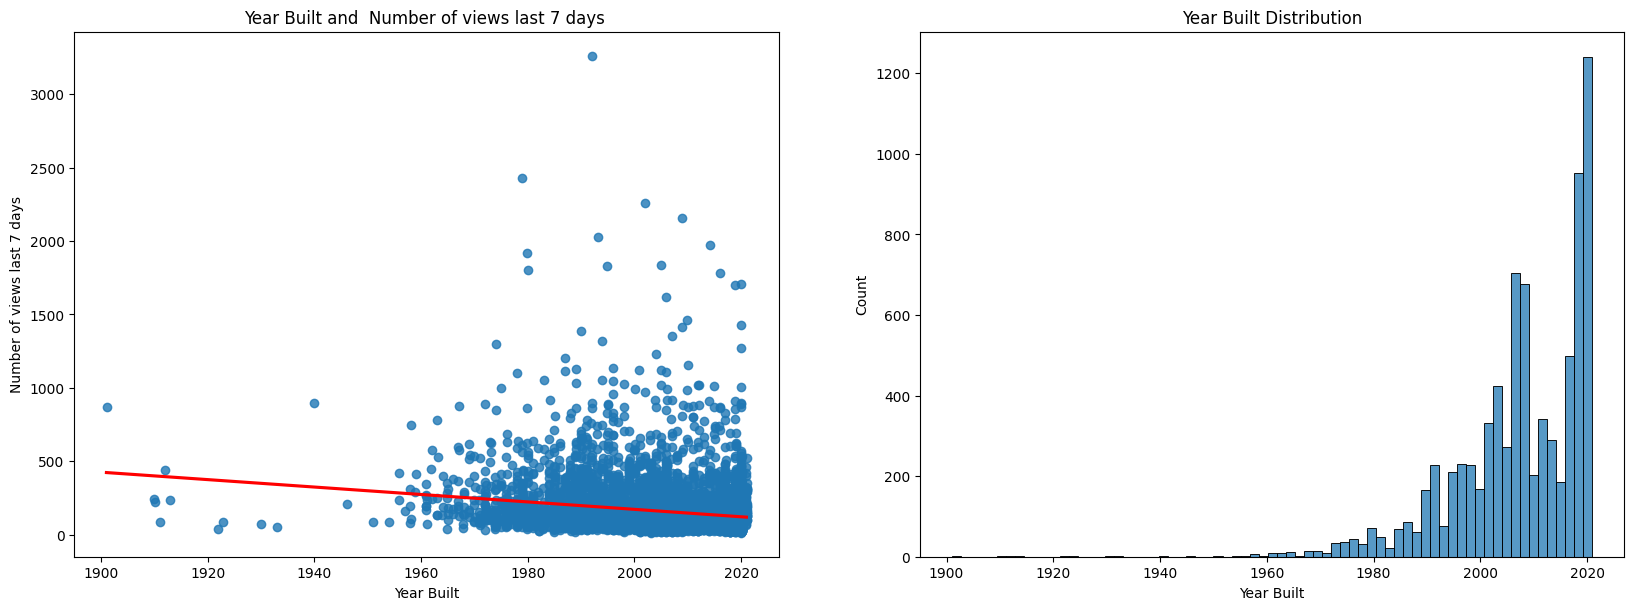

In [31]:
df_Test = df_1[df_1['Year Built'] > 0]

fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Year Built', y='Number of views last 7 days', data=df_Test, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Year Built and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.histplot(df_Test['Year Built'])
ax2.set_title("Year Built Distribution")

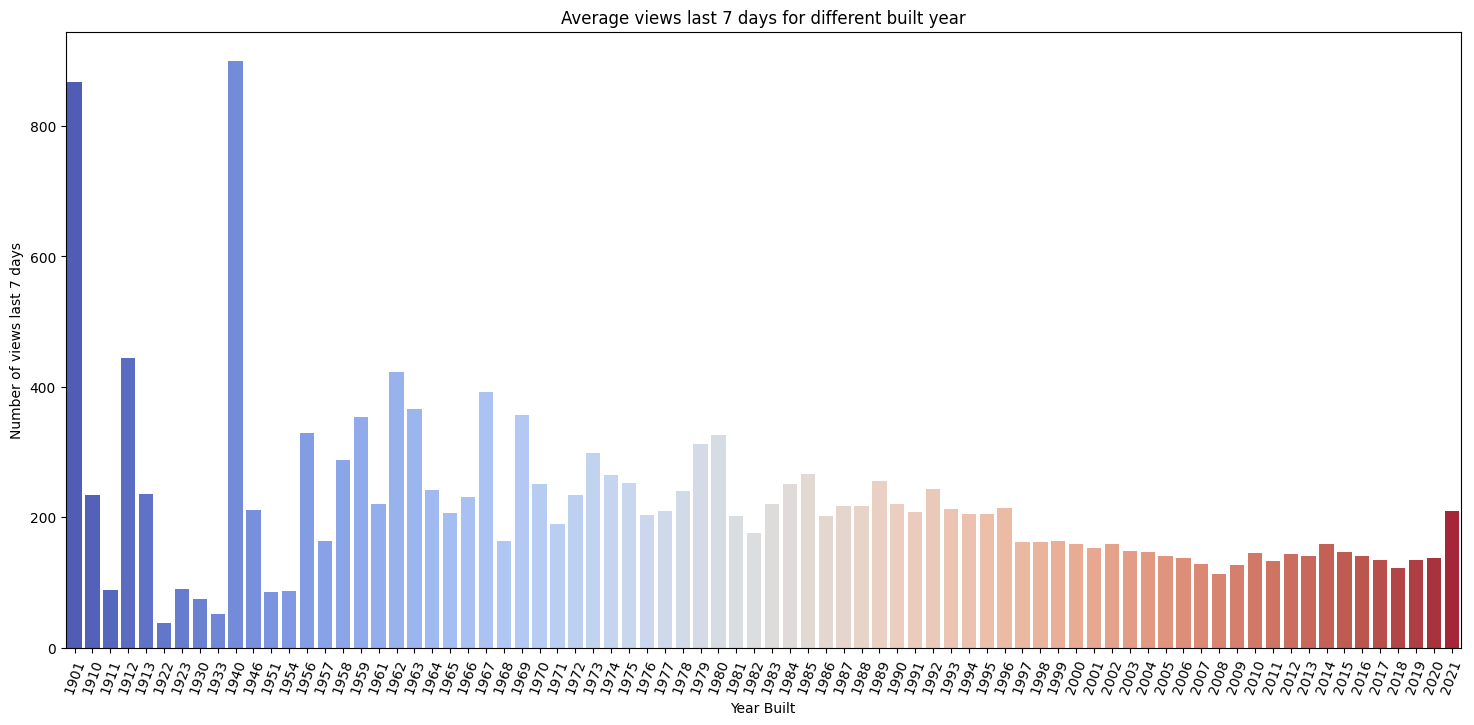

In [32]:
fig = plt.figure(figsize=(18,8) )
Country_View3= df_Test.groupby('Year Built')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Year Built', y='Number of views last 7 days', data=Country_View3,
                 palette="coolwarm")
plt.title("Average views last 7 days for different built year")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.savefig('Year Built.png')

In [33]:
display(df_Test['Year Built'].quantile([0.25, 0.50, 0.75]))

0.25    2001.0
0.50    2008.0
0.75    2018.0
Name: Year Built, dtype: float64

<H3> Remapping categories for 'Year Built' into different age groups and explore how is the difference of number of views between each age group

In [34]:
df_Test['Year Built']
df_Test['age_group'] = pd.cut(df_Test['Year Built'], bins=[0,2001,2018,2022], labels=['Old (built before 2000)', 'Modern (built between 2001-2018)', 'Latest (built after 2018)'])
df_Test['age_group'].value_counts()

/tmp/ipykernel_923/2264851067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test['age_group'] = pd.cut(df_Test['Year Built'], bins=[0,2001,2018,2022], labels=['Old (built before 2000)', 'Modern (built between 2001-2018)', 'Latest (built after 2018)'])


Modern (built between 2001-2018)    4083
Old (built before 2000)             2072
Latest (built after 2018)           1867
Name: age_group, dtype: int64

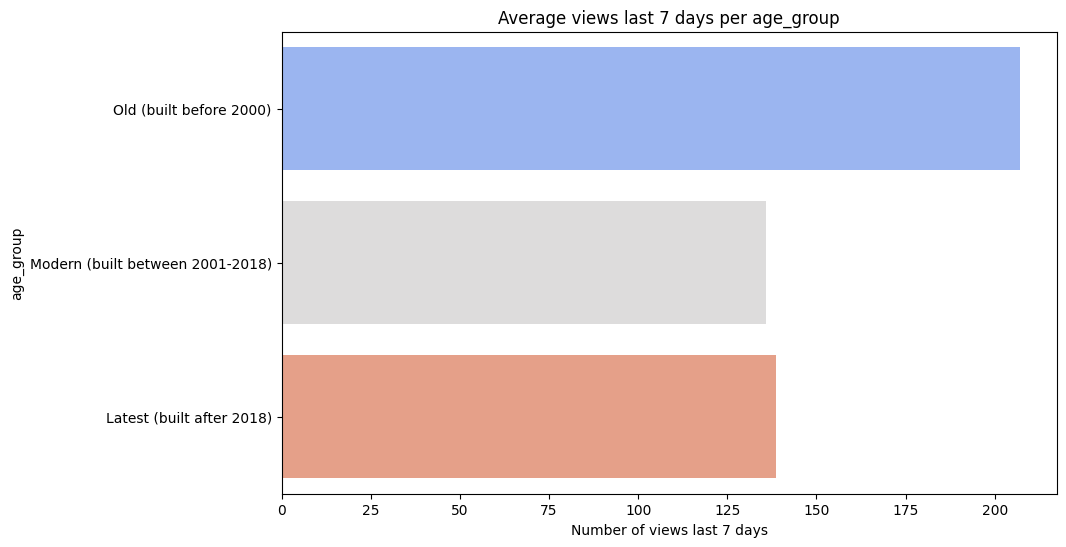

In [35]:
fig = plt.figure(figsize=(10,6) )
age_group= df_Test.groupby('age_group')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='age_group', x='Number of views last 7 days', data=age_group,
                 palette="coolwarm")
plt.title("Average views last 7 days per age_group")
plt.savefig('Year Built bin.png')

<H3> Explore the relationship between boat price (EUR) and number of views

Text(0.5, 1.0, 'Price (EUR) distribution')

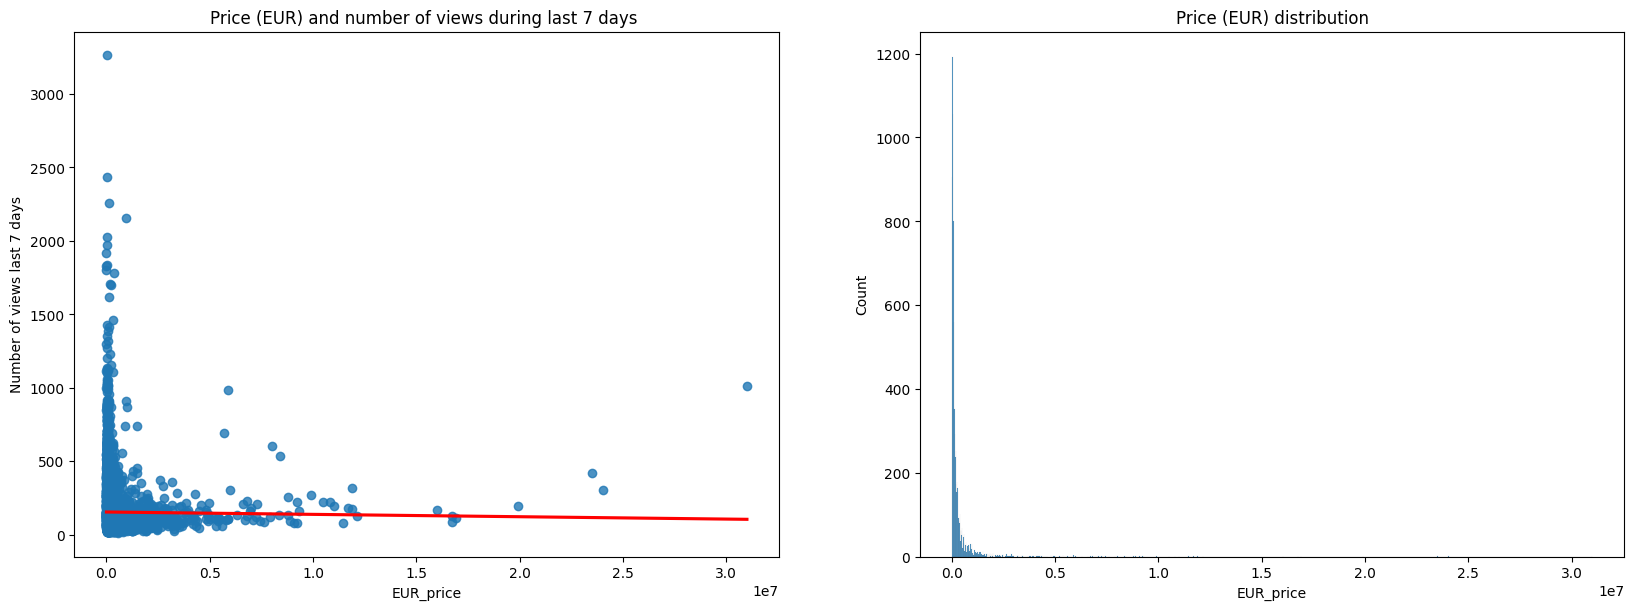

In [36]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='EUR_price', y='Number of views last 7 days', data=df_1, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Price (EUR) and number of views during last 7 days ")
ax2 = fig.add_subplot(224)
sns.histplot(df_1['EUR_price'])
ax2.set_title("Price (EUR) distribution")

<H3> Remapping categories for 'EUR_price' into different age groups and explore how is the difference of number of views between each price group

In [37]:
display(df_1['EUR_price'].quantile([0.25, 0.50, 0.75]))

0.25     44290.0
0.50     95000.0
0.75    250000.0
Name: EUR_price, dtype: float64

In [38]:
df_1['Price_group']= pd.cut(df_1['EUR_price'], bins = [0,44290,250000, np.inf], labels = ['Cheap (less than 44290)', 'Medium (44290-250000)','Expensive (more than 250000)'])
df_1['Price_group'].value_counts()
df_1['Price_group'].isna().sum()

0

Text(0.5, 1.0, 'Average views last 7 days per Views Price_group')

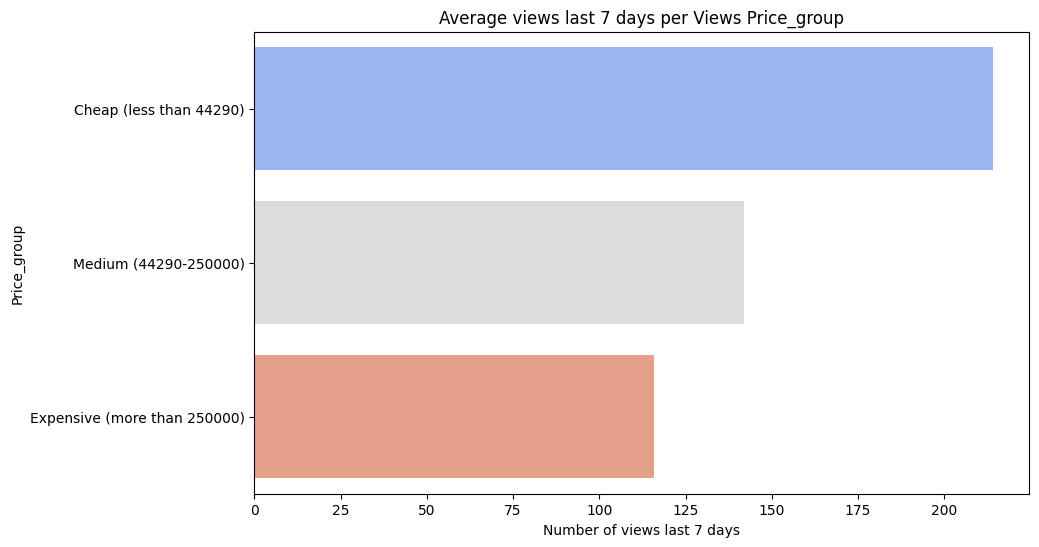

In [39]:
fig = plt.figure(figsize=(10,6) )
Price_group= df_1.groupby('Price_group')['Number of views last 7 days'].mean().reset_index(drop=False)

sns.barplot(y='Price_group', x='Number of views last 7 days', data=Price_group,
                 palette="coolwarm")
plt.title("Average views last 7 days per Views Price_group")

<H3> Remapping categories for 'Length' and 'Width' into different age groups, explore the impact of Length' and 'Width'  on number of views, as well as the difference between each Length and Width group

In [40]:
display(df_1['Length'].quantile([0.25, 0.50, 0.75]))
display(df_1['Width'].quantile([0.25, 0.50, 0.75]))

0.25     7.30
0.50     9.99
0.75    13.68
Name: Length, dtype: float64

0.25    2.54
0.50    3.27
0.75    4.20
Name: Width, dtype: float64

In [41]:
df_1['Length_group']= pd.cut(df_1['Length'], bins = [0, 7.3, 13.7, np.inf], labels = ['short (L<=7.3m)', 'Medium (7.3<L<=13.68)','Long (L>13.68)'])
df_1['Length_group'].value_counts()
df_1['Length_group'].isna().sum()



0

In [42]:
df_1['Width_group']= pd.cut(df_1['Width'], bins = [0,2.54, 4.2, np.inf], labels = ['Thin (W<=2.54)', 'Medium (2.54<W<=4.2)','Thick (W>4.2)'])
df_1['Width_group'].value_counts()
df_1['Width_group'].isna().sum()

0

Text(0.5, 1.0, 'Width and  Number of views last 7 days ')

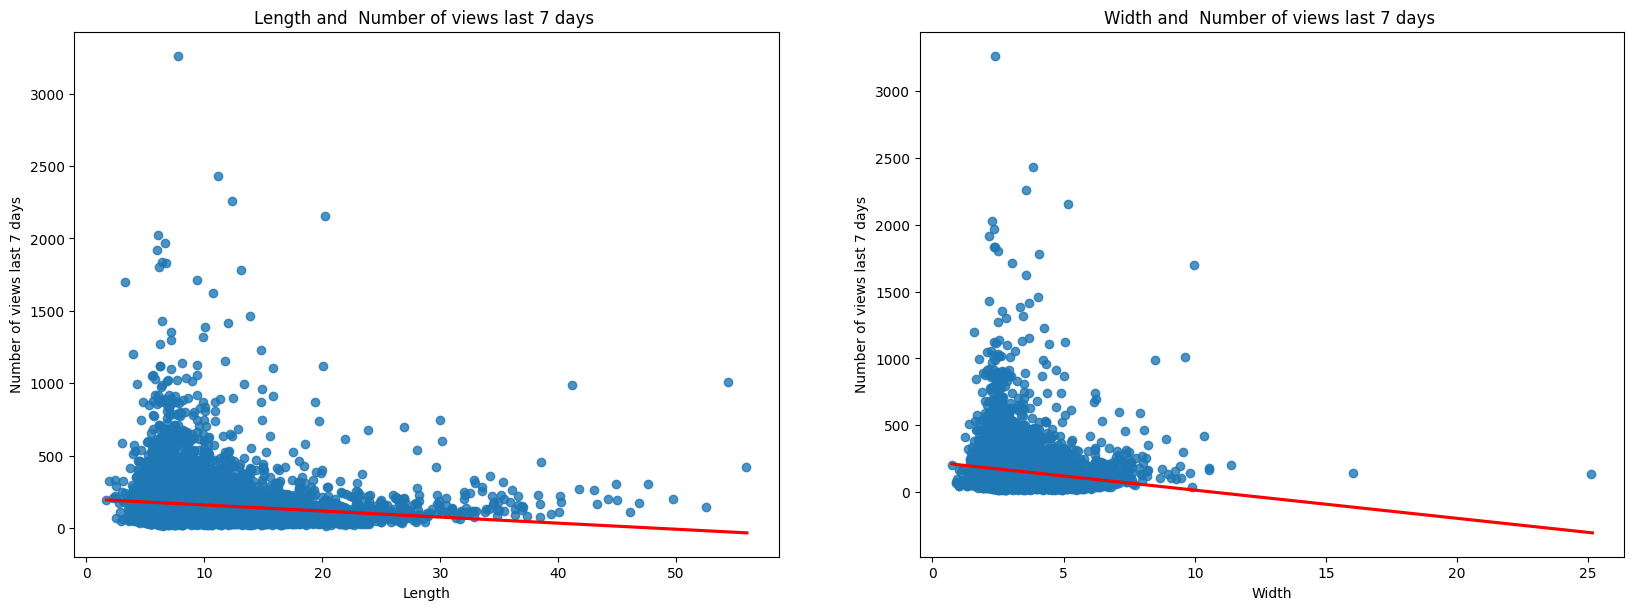

In [43]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Length', y='Number of views last 7 days', data=df_1, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Length and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.regplot(x='Width', y='Number of views last 7 days', data=df_1, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax2.set_title("Width and  Number of views last 7 days ")

Length_group
short (L<=7.3m)          408270
Medium (7.3<L<=13.68)    661277
Long (L>13.68)           238812
Name: Number of views last 7 days, dtype: int64


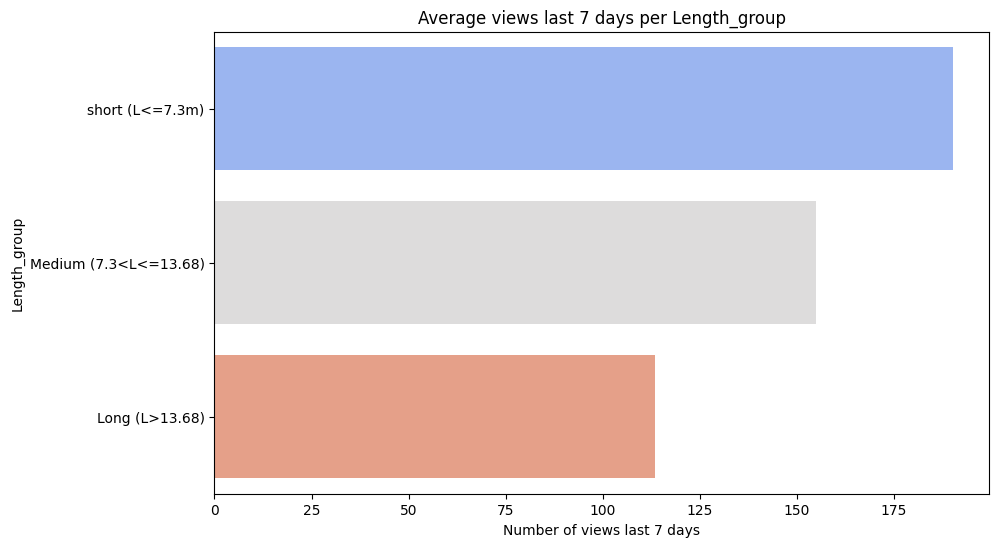

In [44]:
fig = plt.figure(figsize=(10,6) )
Length_group= df_1.groupby('Length_group')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='Length_group', x='Number of views last 7 days', data=Length_group,
                 palette="coolwarm")
plt.title("Average views last 7 days per Length_group")
length_count=df_1.groupby('Length_group')['Number of views last 7 days'].sum()
print(length_count)

Width_group
Thin (W<=2.54)          427758
Medium (2.54<W<=4.2)    645308
Thick (W>4.2)           235293
Name: Number of views last 7 days, dtype: int64


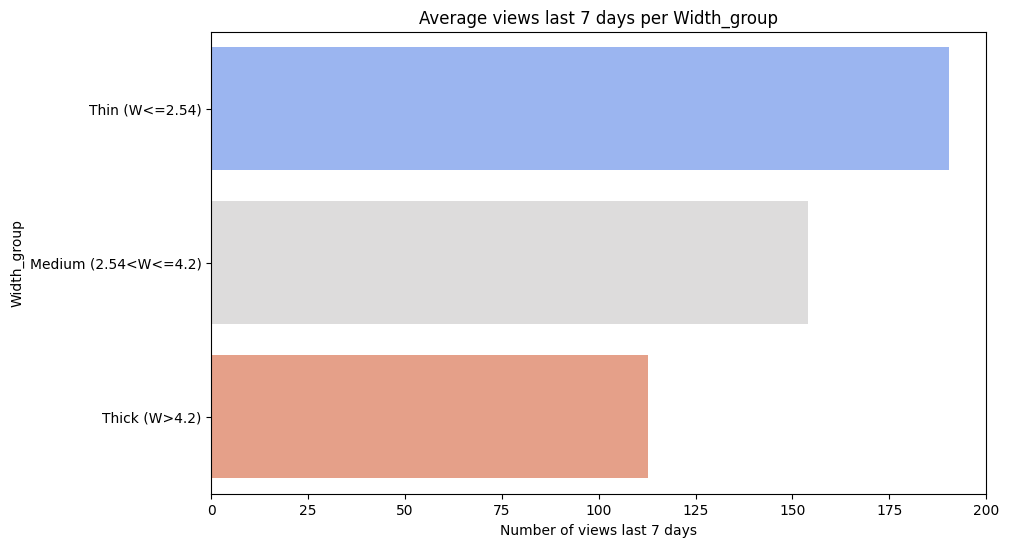

In [45]:
fig = plt.figure(figsize=(10,6) )
Width_group= df_1.groupby('Width_group')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='Width_group', x='Number of views last 7 days', data=Width_group,
                 palette="coolwarm")
plt.title("Average views last 7 days per Width_group")
width_count=df_1.groupby('Width_group')['Number of views last 7 days'].sum()
print(width_count)

<H3> Summary:
    
1. Boat with lower price has higher number of views
2. Top 3 popular boat type:  Wakeboard/Wakesurf, Water ski , Classic
3. People prefer boat in compact size (shorter and thinner boat)
4. Plastic is the overall most popular material for boat, although there is exception for some countries (e.g. France)
5. Switzerland has highest average view
6. In overall customers prefer used boat than new boat (especially in Switzerland) except for countries such as Croatia and Italy
7. Engine type with most average views differs for different countries (
Hybrid: Switzerland;
Unleaded:  Netherland, UK, Denmark;
Gas: Croatia, Portugal, Spain).
8. Old boat (especially those built in 1901 and 1940) has higher average number of views than new boat. 
    
<H3> Recommendations:
    
1. Advertise on cheap boat, give promotion. 
2. Focus on Wakeboard, Water ski and classic boat. 
3. Put more advertisement in boat with smaller size and those built before 2000. 
4. Apply different marketing strategies for different countries, e.g. advertise on boat with hybrid engine in Switzerland and boat with unleaded engine in the rest countries; advertise on aluminum boat in France and plastic boat in the rest of countries. 